# Predictions: Regression for Car Mileage and Diamonds

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/CarsnDiamonds.png" width="50%">


#  I.  Linear Regression for Car Mileage Prediction

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# This section suppresses warnings generated by the code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

## Task 1 - Load the data in a csv file into a dataframe

In [3]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"
df = pd.read_csv(URL)

In [4]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
235,29.0,4,97.0,78,1940,14.5,77,European
89,12.0,8,455.0,225,4951,11.0,73,American
299,21.5,6,231.0,115,3245,15.4,79,American
213,19.0,6,156.0,108,2930,15.5,76,Japanese
178,29.0,4,97.0,75,2171,16.0,75,Japanese


In [5]:
# number of rows and columns in the dataset
df.shape

(392, 8)

### Plot 1
#### This visual representation helps to quickly understand the trade-off between power and fuel efficiency in cars.                                  
MPG (Miles per gallon) vs. Horsepower :                    
There is a negative correlation between MPG and Horsepower. As horsepower increases, MPG tends to decrease.

Text(0.5, 1.0, 'Horsepower vs. Miles Per Gallon (MPG)')

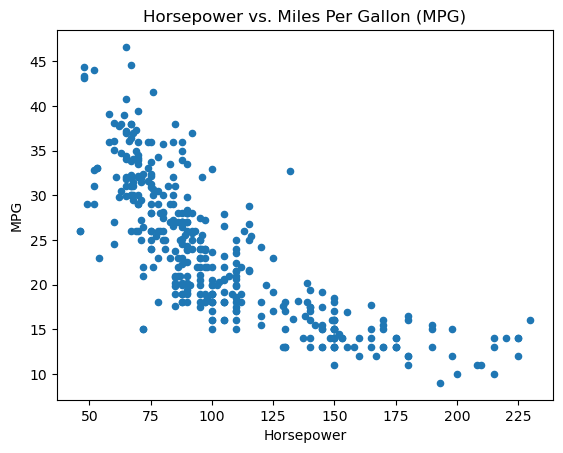

In [6]:
df.plot.scatter(x = "Horsepower", y = "MPG")
plt.title('Horsepower vs. Miles Per Gallon (MPG)')

### Plot 2
MPG (Miles per gallon) vs. Weight :                 
There is a negative correlation between MPG and Weight. Heavier cars tend to have lower MPG.

Text(0.5, 1.0, 'MPG vs. Weight')

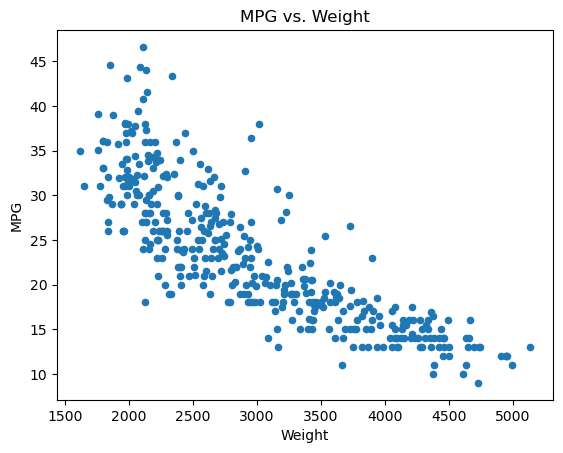

In [7]:
df.plot.scatter(x = "Weight", y = "MPG")
plt.title('MPG vs. Weight')

### Plot 3
Horsepower vs. Weight:                               
There is a positive correlation between Horsepower and Weight. Heavier cars tend to have higher horsepower.

Text(0.5, 1.0, 'Horsepower vs. Weight')

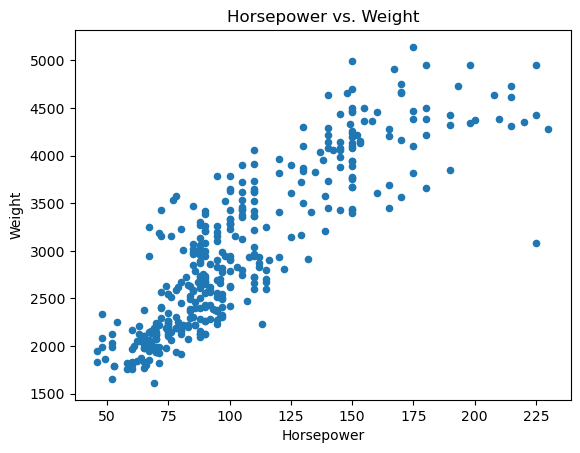

In [8]:
df.plot.scatter(x = "Horsepower", y = "Weight")
plt.title('Horsepower vs. Weight')

### Plot 4
MPG (Miles per gallon) vs. Year:                                                                                          
The boxplot shows that MPG has generally increased over the years. This indicates improvements in fuel efficiency over time.

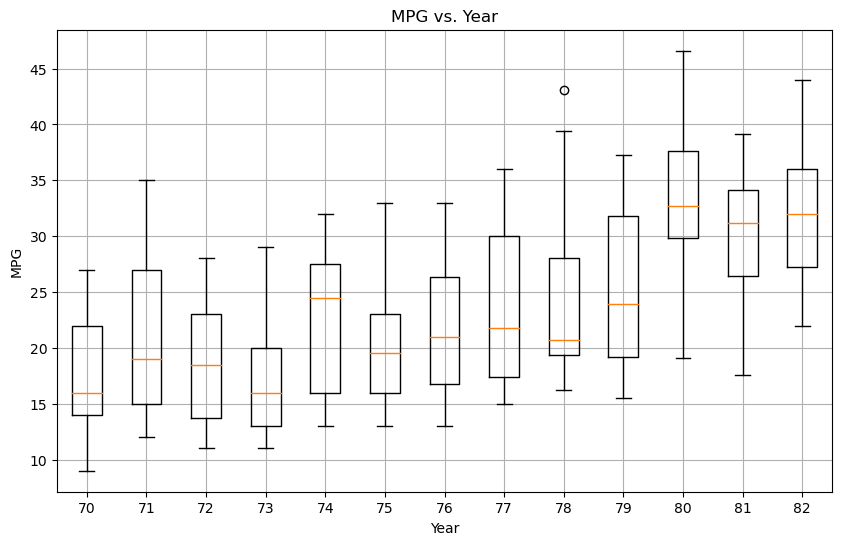

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Year'] == year]['MPG'] for year in sorted(df['Year'].unique())], labels=sorted(df['Year'].unique()))
plt.title('MPG vs. Year')
plt.xlabel('Year')
plt.ylabel('MPG')
plt.grid(True)

### Plot 5
MPG vs. Cylinders:                                        
This plot shows the relationship between the number of cylinders and MPG, indicating that cars with more cylinders tend to have lower MPG.

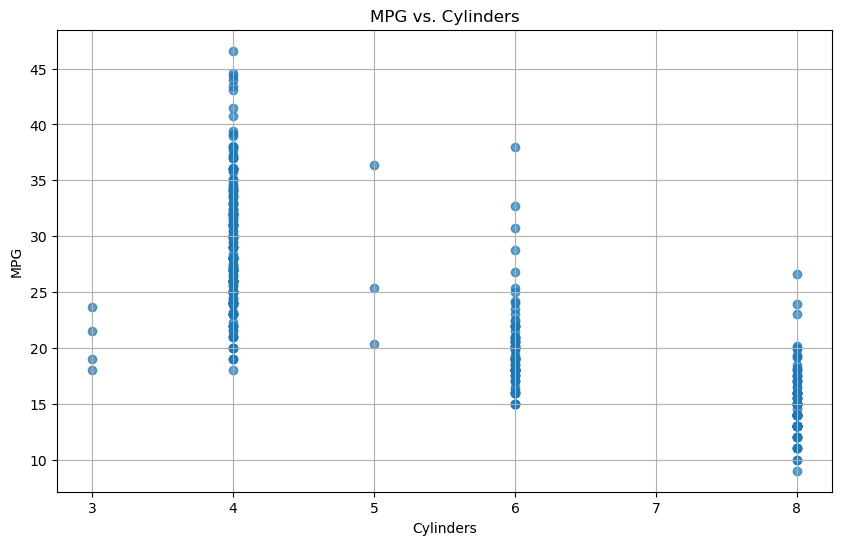

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cylinders'], df['MPG'], alpha=0.7)
plt.title('MPG vs. Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.grid(True)

In [11]:
# Calculate the correlation between MPG and Cylinders
correlation_mpg_cylinders = df['MPG'].corr(df['Cylinders'])
print('Correlation between MPG and Cylinders:', correlation_mpg_cylinders)

Correlation between MPG and Cylinders: -0.7776175081260226


###### This indicates a strong negative correlation, meaning that as the number of cylinders increases, the MPG tends to decrease as shown by the above plot.

## Task 2 - Identify the target column and the data columns

In [12]:
# Target is the value that our machine learning model needs to predict.
target = df["MPG"]

In [13]:
# Features are the values our machine learning model learns from
features = df[["Horsepower","Weight"]]

## Task 3 - Build and Train a Linear Regression Model

In [14]:
# Create the model
lr = LinearRegression()

In [15]:
# Train/Fit the model
lr.fit(features,target)

LinearRegression()

## Task 4 - Evaluate the model and make predictions

In [16]:
# Higher the score, better the model.
lr.score(features,target)

0.7063752737298348

In [17]:
# Let us predict the mileage for a car with HorsePower = 100 and Weight = 2000
lr.predict([[100,2000]])

array([29.3216098])

##### 29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

# II.  Linear Regression for Diamond Price Prediction

In [18]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

In [19]:
df2 = pd.read_csv(URL2)

In [20]:
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
14976,14977,1.10,Premium,G,VS2,60.3,57.0,6032,6.73,6.68,4.04
9535,9536,1.01,Good,F,SI1,62.4,59.0,4619,6.30,6.42,3.97
10245,10246,1.01,Good,H,SI1,63.4,59.0,4749,6.28,6.34,4.00
22902,22903,1.61,Premium,H,SI1,62.5,58.0,10942,7.51,7.46,4.68
5644,5645,0.90,Very Good,D,SI1,61.6,54.0,3880,6.18,6.25,3.83


In [21]:
print(df2.columns)

Index(['s', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')


The dataset contains the above columns                                                    

Here is a brief description of each column and its relevance:
- **s**: Serial number of the diamond.
- **carat**: The weight of the diamond. This is a key factor in determining the diamond's value.
- **cut**: Describes the quality of the diamond's cut (e.g., Ideal, Premium, Good). The cut affects the diamond's brilliance.
- **color**: Describes the color of the diamond, with grades ranging from D (colorless) to Z (light yellow). Color impacts the diamond's appearance and value.
- **clarity**: Describes the clarity of the diamond, indicating the presence of internal or external flaws. Grades range from Flawless (FL) to Included (I3).
- **depth**: The total depth percentage of the diamond, calculated as depth divided by average diameter.
- **table**: The width of the diamond's table expressed as a percentage of its average diameter.
- **price**: The price of the diamond in US dollars.
- **x**: Length of the diamond in millimeters.
- **y**: Width of the diamond in millimeters.
- **z**: Depth of the diamond in millimeters.


### Plot 1: Distribution of Diamond Prices
This histogram shows the distribution of diamond prices. The x-axis represents the price in USD, and the y-axis represents the frequency of diamonds at each price range. The majority of diamonds are priced below $4000, with a few outliers at higher prices.

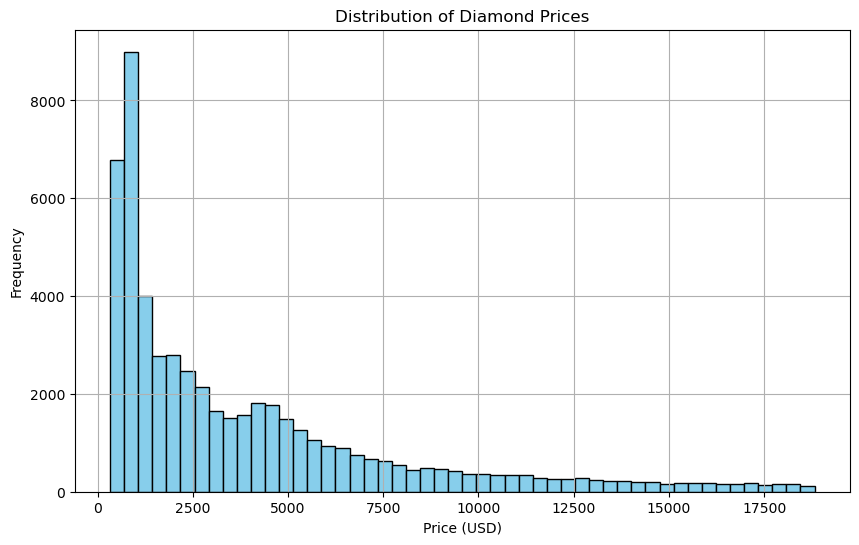

In [22]:
plt.figure(figsize=(10, 6))
df2['price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Plot 2: Scatter Plot of Carat vs. Price
This scatter plot shows the relationship between the carat weight and the price of diamonds. The x-axis represents the carat weight, and the y-axis represents the price in USD. There is a positive correlation between carat weight and price, indicating that larger diamonds tend to be more expensive.

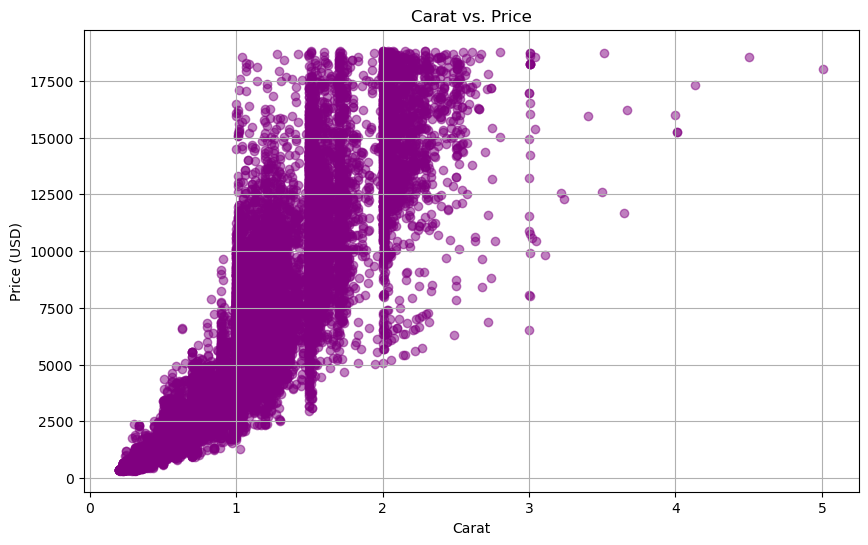

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['carat'], df2['price'], alpha=0.5, color='purple')
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

### Plot 3: Box Plot of Diamond Prices by Cut
This box plot shows the distribution of diamond prices for each cut category. The x-axis represents the cut quality (Ideal, Premium, Good, etc.), and the y-axis represents the price in USD. The box plot displays the median, quartiles, and potential outliers for each cut category. Generally, diamonds with better cuts (e.g., Ideal, Premium) tend to have higher prices.

<Figure size 1000x600 with 0 Axes>

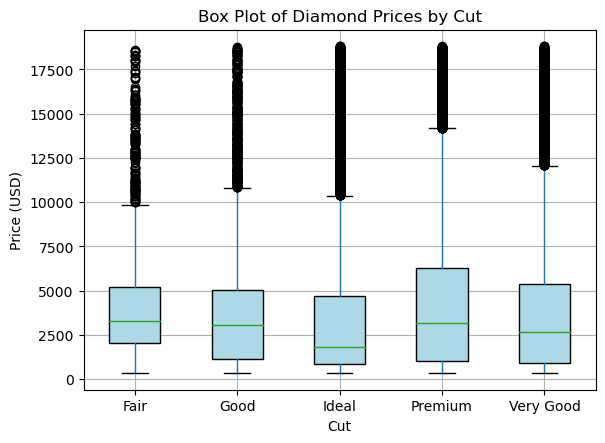

In [24]:
plt.figure(figsize=(10, 6))
df2.boxplot(column='price', by='cut', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Diamond Prices by Cut')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Cut')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

### Plot 4: Bar Plot of Average Price by Color
This bar plot shows the average price of diamonds for each color grade. The x-axis represents the color grade (ranging from D to J), and the y-axis represents the average price in USD. The plot indicates that diamonds with color grades closer to D (colorless) tend to have higher average prices compared to those with lower color grades.

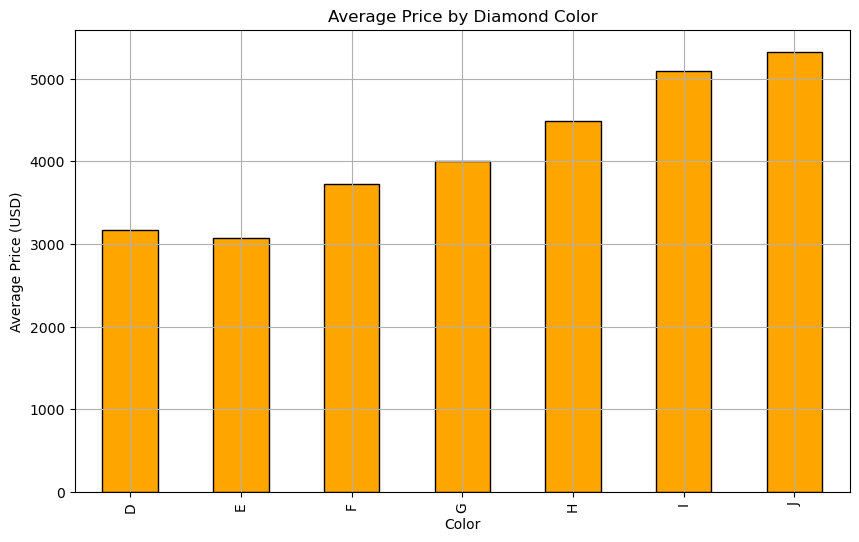

In [25]:
plt.figure(figsize=(10, 6))
avg_price_by_color = df2.groupby('color')['price'].mean()
avg_price_by_color.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Price by Diamond Color')
plt.xlabel('Color')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

In [26]:
# Calculate the average prices for D and J diamonds
avg_price_d = df2[df2['color'] == 'D']['price'].mean()
avg_price_j = df2[df2['color'] == 'J']['price'].mean()

print('Average price for D diamonds:', avg_price_d)
print('Average price for J diamonds:', avg_price_j)

Average price for D diamonds: 3169.9540959409596
Average price for J diamonds: 5323.81801994302


Here are the average prices for D and J diamonds:

*-Average price for D diamonds:*
3169.9540959409596
*-Average price for J diamonds:*
5323.81801994302

Summary:                                                  
This indicates that J diamonds, which are lower in color grade, have a higher average price compared to D diamonds. This might be due to other factors such as carat weight, cut, and clarity influencing the price.                                           The above bar plot indeed contradicts this data. Let's investigate further to understand why this discrepancy exists.

In [27]:
# Investigate the data for D and J diamonds
# Check the distribution of carat, cut, and clarity for D and J diamonds

d_diamonds = df2[df2['color'] == 'D']
j_diamonds = df2[df2['color'] == 'J']

print('D diamonds description:')
print(d_diamonds.describe())
print('J diamonds description:')
print(j_diamonds.describe())

D diamonds description:
                  s        carat        depth        table         price  \
count   6775.000000  6775.000000  6775.000000  6775.000000   6775.000000   
mean   28119.168118     0.657795    61.698125    57.404590   3169.954096   
std    16014.379061     0.359573     1.411030     2.207445   3356.590935   
min       29.000000     0.200000    52.200000    52.000000    357.000000   
25%    13286.500000     0.360000    61.000000    56.000000    911.000000   
50%    30563.000000     0.530000    61.800000    57.000000   1838.000000   
75%    42124.000000     0.905000    62.500000    59.000000   4213.500000   
max    53940.000000     3.400000    71.600000    73.000000  18693.000000   

                 x            y            z  
count  6775.000000  6775.000000  6775.000000  
mean      5.417051     5.421128     3.342827  
std       0.939331     0.935543     0.578527  
min       0.000000     0.000000     0.000000  
25%       4.590000     4.600000     2.820000  
50%      

In [28]:
# Check the distribution of cut and clarity for D and J diamonds
print('D diamonds cut distribution:')
print(d_diamonds['cut'].value_counts())
print('J diamonds cut distribution:')
print(j_diamonds['cut'].value_counts())

print('D diamonds clarity distribution:')
print(d_diamonds['clarity'].value_counts())
print('J diamonds clarity distribution:')
print(j_diamonds['clarity'].value_counts())

D diamonds cut distribution:
Ideal        2834
Premium      1603
Very Good    1513
Good          662
Fair          163
Name: cut, dtype: int64
J diamonds cut distribution:
Ideal        896
Premium      808
Very Good    678
Good         307
Fair         119
Name: cut, dtype: int64
D diamonds clarity distribution:
SI1     2083
VS2     1697
SI2     1370
VS1      705
VVS2     553
VVS1     252
IF        73
I1        42
Name: clarity, dtype: int64
J diamonds clarity distribution:
SI1     750
VS2     731
VS1     542
SI2     479
VVS2    131
VVS1     74
IF       51
I1       50
Name: clarity, dtype: int64


# Summary

### Carat Weight
- **J diamonds**: Higher average carat weight (1.162) compared to D diamonds (0.658).

### Price
- **J diamonds**: Higher average price ($5323.82) compared to D diamonds ($3169.95).

### Cut Distribution
- Both D and J diamonds have a similar distribution of cuts, with 'Ideal' being the most common.

### Clarity Distribution
- Both D and J diamonds have a similar distribution of clarity grades, with 'SI1' being the most common.

### Analysis
- The higher average carat weight of J diamonds could be a significant factor contributing to their higher average price, despite their lower color grade. This could explain the discrepancy between the data and the bar plot.


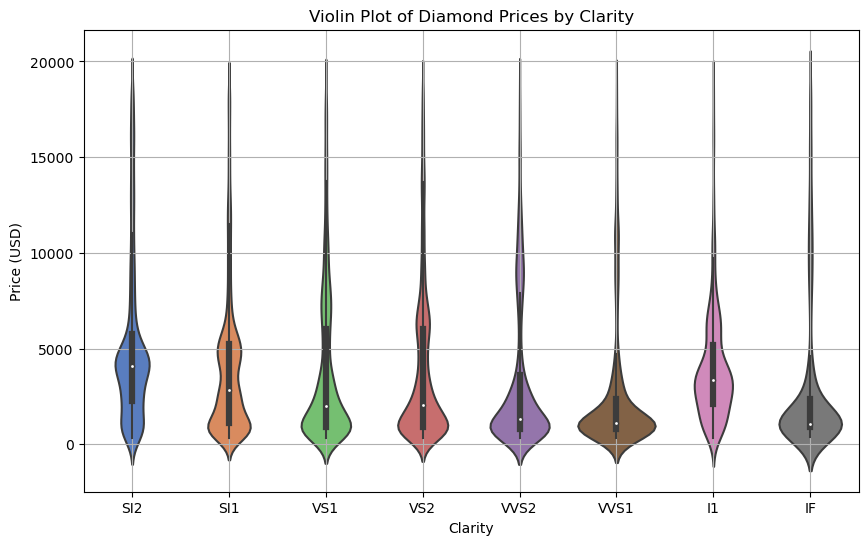

In [29]:
# Plot 5: Violin Plot of Diamond Prices by Clarity
plt.figure(figsize=(10, 6))
import seaborn as sns
sns.violinplot(x='clarity', y='price', data=df2, palette='muted')
plt.title('Violin Plot of Diamond Prices by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [30]:
# use the price column as target
# use the columns carat and depth as features
target = df2['price']
features = df2[['carat','depth']]

In [31]:
# Create LR model and train it
lr2 = LinearRegression()
lr2.fit(features,target)

LinearRegression()

In [32]:
# Score of model
lr2.score(features,target)

0.8506754571636563

In [33]:
# Predict the price of a diamond with carat = 0.3 and depth = 60
lr2.predict([[0.3,60]])

array([244.95605225])

###### Predicted Price of diamond is $244.95605225